# Анализ оттока клиентов 

В нашем отделе маркетинга нет автоматизированных систем рассылок, письма каждому клиенту пишутся вручную, поэтому нам важно для отдела маркетинга представить компактные однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

**Цель исследования** - изучить причины оттока клиентов, сегментировать пользователей банка, предоставить рекомендации по удержанию и возврату клиентской базы

**Ход исследования**
___

**Исследование пройдёт в несколько этапов:**

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Корреляционный анализ
5. Статистический анализ
6. Сегментация пользователей
7. Выводы и рекомендации для заказчика

**На каждом этапе будут подготовлены итоги анализа**

# Материалы

* [Презентация](https://disk.yandex.ru/i/f3KKoaJrrX1Ztw)

* [Дашборд](https://public.tableau.com/views/Final_16806421769350/sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Обзор данных 

### Изучим данные

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from plotly import graph_objects as go
from scipy import stats as st

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 

path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)

In [3]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
# заменим столбцы
data = data.rename(columns={'USERID' : 'user_id', 'EST_SALARY' : 'est_salary'})
print(data.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


**Описание данных:**

`user_id` - идентификатор пользователя;

`score`- баллы кредитного скоринга;

`city` - город;

`gender` - пол;

`age` - возраст;

`equity` - приблизительная оценка собственности;

`balance` - баланс на счете;

`products` - количество продуктов, которыми пользуется клиент;

`credit_card` - есть ли кредитная карта;

`last_activity` - был клиент активен последнее время;

`est_salary` - оценочная заработная плата клиента;

`churn`- уходит или нет.

## Предобработка данных

### Меняем тип данных

In [5]:
obj_df = data.select_dtypes(include=['object']).copy()

In [6]:
dd = pd.get_dummies(obj_df, columns=['city', 'gender'])
dd.head(5)

,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,False,True,False,True,False
1,False,True,False,True,False
2,False,True,False,True,False
3,False,False,True,True,False
4,False,False,True,False,True


In [7]:
#df.merge(dd, on='user_id', how='right')
#df.head(5) 

In [8]:
df = pd.concat([data,dd], sort=False, axis=1)
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,False,True,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,False,True,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,False,True,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,False,False,True,True,False
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,False,False,True,False,True


In [9]:
df['balance'] = df['balance']/1000
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59.21482,2,0,1,75719.14,1,False,True,False,True,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850.59433,3,1,0,86621.77,0,False,True,False,True,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,False,True,False,True,False
3,225363,866.0,Ярославль,Ж,51.0,5,1524.74626,2,0,1,174423.53,1,False,False,True,True,False
4,157978,730.0,Ярославль,М,34.0,5,0.17400,1,1,0,67353.16,1,False,False,True,False,True


### Проверка на пропуски и дубликаты

In [10]:
# проверим пропуски, дубликаты и тип данных
display(df.info())
print(f'Количество дубликатов {df.duplicated().sum()}')
print(f'Количество пропусков {df.isnull().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   score           10000 non-null  float64
 2   city            10000 non-null  object 
 3   gender          10000 non-null  object 
 4   age             9974 non-null   float64
 5   equity          10000 non-null  int64  
 6   balance         7705 non-null   float64
 7   products        10000 non-null  int64  
 8   credit_card     10000 non-null  int64  
 9   last_activity   10000 non-null  int64  
 10  est_salary      10000 non-null  float64
 11  churn           10000 non-null  int64  
 12  city_Ростов     10000 non-null  bool   
 13  city_Рыбинск    10000 non-null  bool   
 14  city_Ярославль  10000 non-null  bool   
 15  gender_Ж        10000 non-null  bool   
 16  gender_М        10000 non-null  bool   
dtypes: bool(5), float64(4), int64(6)

None

Количество дубликатов 0
Количество пропусков 2321


Пропуски имеются в двух столбцах - возвраст и баланс. В возрасте всего 26 пропусков, на наши данные никак не повлияет, поэтому оставим без изменений. В столбце баланса счета, 23% пропусков, убрав строки или заменим их значением, можем исказить выборку, решение - оставим пропуски.

### Анализ пропусков

MCAR - есть зависимость пропусков от определенной группы намерено, не приведет к искажениям

MAR - есть зависимость пропусков от определенной группы внутри данных

MNAR - есть зависимость пропусков от определенной группы вне нашей выборки

Есть два метода обнаружения недостающих данных: - isnull() и notnull().

Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» ( True ) означает, что значение является отсутствующим значением, а «Ложь» ( False ) означает, что значение не является отсутствующим.

In [11]:
#display(df.groupby(df['age'].isnull()).mean())
#display(df.groupby(df['balance'].isnull()).mean())

TypeError: Could not convert РыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльРостовЯрославльЯрославльРостовРыбинскРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовРостовРостовРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльРостовЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовРыбинскРостовЯрославльРостовРостовРыбинскРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРостовРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРостовЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРостовРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскРыбинскЯрославльРыбинскРостовРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльРостовРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРостовРыбинскЯрославльРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРостовРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРостовРостовРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРостовРостовРыбинскРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовРостовЯрославльРыбинскРостовРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскРостовРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскРостовРыбинскЯрославльРыбинскРыбинскРостовРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРостовРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскРостовРыбинскЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРостовРостовЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскРыбинскРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскРостовРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскРыбинскРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРостовРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРостовЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРостовРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскРостовЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовРостовРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРостовРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРостовРыбинскРыбинскЯрославльРостовРыбинскЯрославльРостовЯрославльРостовРостовРостовРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльРостовРыбинскРостовРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльРостовРыбинскЯрославльРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльРостовЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскРостовРостовЯрославльЯрославльРостовРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРостовЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРостовРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскРостовРыбинскРыбинскРостовРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльРостовРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльРостовЯрославльРостовРыбинскРостовРыбинскРостовРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскРостовРыбинскЯрославльРыбинскРостовЯрославльРыбинскРостовРыбинскЯрославльЯрославльРостовЯрославльРыбинскРыбинскРостовРыбинскЯрославльЯрославльРыбинскРостовРыбинскРыбинскРыбинскЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльРостовРостовРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскРостовРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльРыбинскРыбинскЯрославльРыбинскРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльРостовРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскРостовЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРостовРостовРостовЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскРостовРыбинскРостовРостовРостовЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРостовРостовЯрославльЯрославльРыбинскРостовРыбинскРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРостовРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРыбинскРостовРостовРостовЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовРыбинскРыбинскРыбинскРыбинскЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскРыбинскРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскРыбинскРостовРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскРостовРыбинскРыбинскРыбинскРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльРостовЯрославльРостовРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскРостовРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРостовРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовРыбинскРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскРостовРыбинскРостовРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльРостовРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльЯрославльРостовРыбинскРыбинскРостовРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРостовРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРостовРыбинскРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльРостовРостовРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовРостовРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовРостовЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовРостовРыбинскРыбинскРыбинскРостовЯрославльЯрославльРыбинскРостовРостовРостовЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскРостовЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльРыбинскРыбинскРостовЯрославльРостовРостовРостовРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовРостовРостовЯрославльРостовРыбинскРостовРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскРыбинскЯрославльРыбинскРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскРостовЯрославльЯрославльРостовЯрославльРостовРостовЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРостовРостовЯрославльРыбинскЯрославльЯрославльРыбинскРостовРыбинскРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльЯрославльРыбинскРыбинскРостовРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРостовРыбинскРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовЯрославльРыбинскЯрославльРостовРостовРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскРыбинскРыбинскРыбинскРостовЯрославльЯрославльРостовРыбинскРыбинскРыбинскРыбинскРыбинскРостовЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовРостовРостовРыбинскРыбинскРыбинскРыбинскРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРостовЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРостовРыбинскЯрославльЯрославльРостовРостовРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовРостовЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскРостовРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРостовРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскЯрославльРыбинскРыбинскРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльРостовЯрославльРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРостовРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРыбинскРостовРостовРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРостовРостовЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовРостовРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскРыбинскЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРостовРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскРостовРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРостовЯрославльРыбинскРыбинскРостовРостовЯрославльЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРостовЯрославльРостовРыбинскРостовЯрославльРыбинскЯрославльРостовРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРостовРыбинскЯрославльРостовРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовРостовЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРостовЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРостовРыбинскРостовРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльРостовРостовЯрославльРостовРостовРостовЯрославльРостовРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовРостовРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльРостовРостовЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовРостовРыбинскЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскЯрославльРыбинскРостовЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскРостовРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРостовРыбинскЯрославльРостовЯрославльРыбинскРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовРостовЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскРостовРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскРостовРостовРостовЯрославльРыбинскРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовРостовЯрославльРостовЯрославльРостовРостовРостовЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРостовРостовРыбинскРыбинскЯрославльРыбинскРостовРостовЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовРостовРостовРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовРостовРыбинскРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРостовЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРостовРыбинскРыбинскРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскРостовРостовЯрославльРыбинскРостовРыбинскРостовРыбинскЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскРостовЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльРыбинскРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРостовРыбинскРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРостовРостовРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРостовЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовЯрославльРостовРостовРыбинскЯрославльРостовРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскРостовРыбинскРостовРостовЯрославльЯрославльРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльРостовРыбинскЯрославльЯрославльРостовРостовРыбинскЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРостовЯрославльРостовЯрославльЯрославльРостовЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовРостовРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРостовРыбинскРыбинскРостовЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльРостовРыбинскРыбинскРыбинскЯрославльРыбинскРостовЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльРостовРыбинскРостовРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскРостовРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРостовРыбинскРыбинскРыбинскЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовРыбинскРостовЯрославльРостовРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРостовРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРостовЯрославльРостовРыбинскРостовЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльРостовРыбинскЯрославльРостовЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРостовЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовРостовРостовЯрославльРостовРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРыбинскРыбинскРыбинскЯрославльРостовРостовРостовЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовРостовЯрославльРостовЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовРыбинскЯрославльРостовЯрославльРостовЯрославльРостовЯрославльЯрославльРыбинскРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльРостовРостовРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРостовРостовЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльРостовРостовЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРостовЯрославльРыбинскЯрославльРыбинскРостовРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРостовРостовРыбинскРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскРостовРыбинскРостовЯрославльРыбинскРостовЯрославльРостовРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРостовРостовРостовРыбинскЯрославльРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскРыбинскРыбинскЯрославльЯрославльРостовЯрославльРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовРыбинскРыбинскЯрославльЯрославльРыбинскЯрославльРыбинскРостовРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскРостовЯрославльЯрославльРыбинскРыбинскРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльРыбинскЯрославльРыбинскРыбинскРостовЯрославльЯрославльРостовРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскРостовЯрославльЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРостовЯрославльЯрославльРыбинскРыбинскРостовЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльРыбинскЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРостовРыбинскЯрославльРыбинскРостовРостовЯрославльЯрославльЯрославльРостовЯрославльРостовРыбинскРыбинскРостовЯрославльРыбинскЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРостовЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльРыбинскРыбинскРостовЯрославльРостовЯрославльЯрославльЯрославльРостовЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльРыбинскЯрославльРыбинскРостовЯрославльРыбинскЯрославльЯрославльЯрославльРостовРыбинскРыбинскРостовЯрославльРостовЯрославльЯрославльРостовЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльРыбинскРостовРостовРыбинскРыбинскРыбинскРостовРостовЯрославльЯрославльРостовРыбинскРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскЯрославльЯрославльЯрославльЯрославльРыбинскРыбинскРостовРыбинскЯрославльЯрославльЯрославльРыбинск to numeric

Для более детального анализа, создадим новую колонку `age_NaN` и `balance_NaN`. 

Используем метод `where()`, где прописываем условие: если значение в колонке отсутствует, то присваиваем в колонке значение 0, если присутствует, то 1.

In [ ]:
df['age_NaN'] = np.where(df['age'].isnull(), 0,1)
df.head()

In [ ]:
df['balance_NaN'] = np.where(df['balance'].isnull(), 0,1)
df.head()

In [ ]:
print(df.groupby(['age_NaN']) ['churn'].value_counts(normalize=True))
print(df.groupby(['balance_NaN']) ['churn'].value_counts(normalize=True))

Очень низкий процент клиентов собирающихся уходить с пропусками в колонках возраста и баланса - 0,03% и 0,005%. 

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr().loc[:,['age_NaN']].drop('age_NaN').sort_values('age_NaN'), annot=True, fmt= '.0%', cmap='Blues', center=0)
plt.show()

Нет явной зависимости пропущенных значений в колонке возраст от других данных выборки

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr().loc[:,['balance_NaN']].drop('balance_NaN').sort_values('balance_NaN'), annot=True, fmt= '.0%', cmap='Blues', center=0)
plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">

**Вывод по анализу пропущенных значений**

**Возраст**
* Всего 26 клиентов имеют пропуск в столбце возраст
* Нет явной зависимости пропущенных значений в колонке возраст от других данных выборки

**Баланс**

* Большинство клиентов с пропускми в балансе являются действющими клиентами
* Имеют 1-2 продукта
* Один из продуктов скорее всего кредитная карта (81,5% имеют кредитную карту) 
* По оценке банка не имеют объектов собственности
    
Зависимости "все пропуски относятся к ушедшим клиентам" нет, пропуски в балансе есть и у действующих клиентов.
    

Для клиентов, имеющих единственный продукт, которым является кредитная карта, нулевой остаток может считаться допустимым явлением, либо влияет специфика продукта, например страховка, однако однозначный ответ мы дать не можем.

Отсутствие у клиента объектов собственности по оценке банка может свидетельствовать о недостатке информации у банка о клиенте. Вместе с этим, модель оценки может учитывать информацию о балансе на счете клиента. Отсутствие информации о балансе в выгрузке могло привести к некорректной работе модели и, как следствие, к нулевой оценке.
____

Исходя из полученной аналитики касательно пропусков баланса, можно сделать вывод, что это категория пропусков **MNAR (Missing Not At Random / Отсутствует не случайно)** — пропуски зависят от данных, которых нет в нашем датасете, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
___

</div>

## Исследовательский анализ

### Исследование портрета клиента

In [ ]:
# посмотрим на распределения значений
display(df.describe(percentiles=[1/2, 0.95]))

**По таблице мы уже можем выделить несколько выводов о данных**

* Максимальные баллы кредитного скоринга 1000, минимальный балл в выборке 642
* Возраст - от 18 до 86 лет
* Приблизительная оценка стоимости - от 0 до 9
* Количество продуктов - от 0 до 5

Другие столбцы отвечают на вопрос да или нет

0 - нет (Прим. нет кредитной карты)

1- да (Прим. да уходит из банка)

In [ ]:
df.groupby('churn').describe(include='all') 

В данных есть выбросы, поэтому мы будем смотреть характеристики отточных и неотточных пользователей по медиане, также посмотрим минимальные и максимальные значения данных

In [ ]:
pd.pivot_table(df,
               index=["churn"],
               aggfunc=[np.median])

In [ ]:
pd.pivot_table(df,
               index=["churn"],
               aggfunc=[min])

In [ ]:
pd.pivot_table(df,
               index=["churn"],
               aggfunc=[max])

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">

**Характеристики отточных и неотточных пользователей**

Пользователь оттока

* Медиана среднего возраста 39 лет, минимальный - 18, максимальный - 79
* Медиана оценки собственности - 4
* Заработная плата - 125 тыс., мин - 10тыс., макс - 1286 тыс.
* Оценка скоринга - 866, мин - 706, макс - 1000
* В основном имеет кредитную карту
* Количество продуктов - 2
* Баланс на карте - 782 тыс.

Неотточный пользователь

* Медиана среднего возраста 40 лет, минимальный - 18, максимальный - 86
* Медиана оценки собственности - 3
* Заработная плата - 125 тыс., мин - 2 тыс., макс - 1396 тыс.
* Оценка скоринга - 866, мин - 642, макс - 1000
* В основном имеет кредитную карту
* Количество продуктов - 2
* Баланс на карте - 475 тыс.


</div>

In [ ]:
#посмотрим какие столбцы относятся к бинарным и небинарным 
bi = []
nonbi = []
for col in df.columns.values:
    if df[col].max() == 1:
        bi.append(col)
    else:
        nonbi.append(col)
print(bi)
print(nonbi)

Столбец `churn` - уходит клиент из банка или нет, это основной показатель для нашего анализа. Посмотрим сколько всего клиентов остаются или уходят

In [ ]:
df['churn'].value_counts()

Из 10000 пользователей, 1820 собираются уходить из банка

In [ ]:
 # визуализируем отличия бинарных признаков
for col in bi:
    plt.figure(figsize=(8, 7))
    sns.histplot(x=col, data=df, hue='churn', multiple='stack')
    plt.xlabel(col)
    plt.ylabel('Количество клиентов')
    plt.show()

In [ ]:
 # визуализируем отличия не бинарных признаков
for col in nonbi:
    plt.figure(figsize=(15, 7))
    sns.histplot(x=col, data=df, hue='churn', multiple='stack')
    plt.xlabel(col)
    plt.ylabel('Количество клиентов')
    plt.show()

#### Зависимость от местоположения

Посмотрим какое количество клиентов хочет уйти в разных городах

In [ ]:
def pivot(df, index):
    
    pivot = df.pivot_table(index = index, values = 'churn', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во уходящих', 'Уровень оттока']
    display(pivot.sort_values('Уровень оттока', ascending = False))
    
    
    
    fig = px.bar(pivot, x = index, y = 'Уровень оттока', color = 'Уровень оттока', title = 'Уровень оттока ' + index)
    fig.show()
    

pivot(df, 'city')

В выборке имеем 3 города это - Ростов, Рыбинск и Ярославь.

* В Рыбинске самый низкий показатель отточных клиентов
* Ярославь и Ростов примерно на одном уровне, при этом, количество клиентов в Ярославе в 2 раза больше, чем в Ростове

Для анализа будет релевантно брать клиентов в городах с наивысшим уровнем оттока

#### Зависимость от пола

In [ ]:
# посмотрим какой процент пользователей более отточные в зависимости от пола
pivot(df, 'gender')

Процент оттока мужчин выше - 24%, чем женщин - 13%

#### Возраст отточных клиентов

In [ ]:
pivot(df, 'age')

**Высокий процент оттока в зависимости от возраста:**

* 21 год - скорее всего студенты
* от 25 до 29 лет - категория взрослого работающего населения
* от 51 до 60 - предпенсионного возраста

Количество пользователей от 65 лет, составляет 5% от выборки, такие пользователи уже не планируют менять свой банк, а скачок на 79 годах можем считать выбросом. Посмотрим еще влияние балла кредитного скоринга и количество продуктов на оценочную заработную плату клиента.

In [ ]:
### КОД РЕВЬЮЕРА
df.columns.difference(['city','age','gender','churn'])

**Какие данные будем изучать в зависимости от оттока**

* credit_card - влияет ли наличие кредитной карты
* equity - влияет ли оценка собтсвеннности
* est_salary - влияет ли заработная плата пользователей
* last_activity - был ли клиент активен последний месяц
* products - влияет ли количество продуктов пользователей
* score - влияет ли балл кредитного скоринга
* age - какой возраст отточных клиентов
* city - в каком городе наиболее высокий уровень оттока
* balance - текущий баланс клиента 

**Не влияет на анализ оттока**

* user_id - уникальный номер клиента не влияет на аналих

Посмотрим подробнее показатели отточных клиентов

In [ ]:
#уходят
leave = df.query('churn == 1')
leave

Всего 1820 клиентов собираются закрыть свой счет

#### Влияние балла кредитного скоринга на оценочную заработную плату клиента

In [ ]:
def pivot2(df, index):
    pivot2 = df.pivot_table(index = index, values = 'est_salary', aggfunc = ['count','mean']).reset_index()
    pivot2.columns = [index, 'Кол-во значений', 'Среднее значение']
    display(pivot2.sort_values('Среднее значение', ascending = False))
    fig = px.scatter(df, x= index, y="est_salary", color="churn")
    fig.show()
pivot2(df, 'score')

* Наиболее плотное распределение у клиентов с баллам от 750 до 950.
* У VIP сегмента плотность в разрезе 700 - 800 и 900 - 1000
* Высокий уровень оттока у клиентов с зарплатой в диапозоне от 75 до 200 тыс.

VIP сегмент наиболее важен для банков, их стоит посмотреть отдельно

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(df[df['churn'] == 0]['score'], bins=40, density=True, alpha=0.5, color='red', label = 'churn' + "0")
ax.hist(df[df['churn'] == 1]['score'], bins=40, density=True, alpha=0.5, color='yellow', label = 'churn' + "1")
plt.title('Влияние оттока на оценку скоринга пользователей')
plt.xlabel('Оценка скоринга')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

In [ ]:
#sns.scatterplot(data=df,x="score",y='est_salary',hue='churn',alpha=.3,size=1);

#### Влияние количества продуктов на оценочную заработную плату клиента

In [ ]:
pivot(df, 'products')

* 63% пользователей имеющих 4 продукта привержены оттоку
* Несмотря на небольшой процент оттока у клиентов имеющих 1 продукт (20%), таких клиентов 969, их можно определить в отдельный сегмент
* Большая плотность у пользователей имеющих 3 и 5 продуктов, но таких клиентов всего 302 человек
* Всего 601 пользователей, у которых от 3-х продуктов хотят покинуть банк


#### Влияние оценки собственности на отток клиентов

In [ ]:
pivot(df, 'equity')

* По графику видим, что чем больше оценка собственности, тем выше уровень оттока
* Самый высокий уровень от 6 до 9

#### Распределение баланса в зависимости от оттока

In [ ]:
df = df[(df.balance <= 10000)]

In [ ]:
fig = px.scatter(df, y= 'balance', color="churn", opacity = .3)
fig.show()

Баланс равновмерно распределен по всей выборке, нет явной зависимости оттока. Посмотрим на другом графике

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(df[df['churn'] == 0]['balance'], bins=40, density=True, alpha=0.5, color='red', label = 'churn' + "0")
ax.hist(df[df['churn'] == 1]['balance'], bins=40, density=True, alpha=0.5, color='yellow', label = 'churn' + "1")
plt.title('Влияние оттока на баланс пользователей')
plt.xlabel('Баланс пользователей')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

На втором графике видно, что пользователи с балансом от 1 млн. более привержены оттоку

In [ ]:
df.query('churn == 1 and balance > 1000').sort_values(by = 'balance', ascending=False)

In [ ]:
df.query('balance > 1000').agg({"churn":["count","sum","mean"]})

Всего таких клиентов клиентов приверженных оттоку 711, это 38% в сегменте, мы возьмем более объемную выборку

In [ ]:
#sns.histplot(data=df,
    #hue="churn",
    #x="balance",
    #stat="density",
    #common_norm=False,
    #palette="flag"
#);

####  Заработная плата клиентов 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(df[df['churn'] == 0]['est_salary'], bins=40, density=True, alpha=0.5, color='red', label = 'churn' + "0")
ax.hist(df[df['churn'] == 1]['est_salary'], bins=40, density=True, alpha=0.5, color='yellow', label = 'churn' + "1")
plt.title('Влияние оттока на зарплату пользователей')
plt.xlabel('Заработная плата пользователей')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

Наиболее плотное распределение отока от 75 тыс. до 200 тыс.

### Отточные клиенты

#### Какой процент отточных клиентов имеет кредитную карту

In [ ]:
leave_group = leave.groupby('credit_card')['user_id'].count().sort_values(ascending=False).reset_index()
leave_group

In [ ]:
name_rest = ['Есть кредитная карта', 'Нет кредитной карты']
values = [817, 1003]
''
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title = 'Какой процент отточных клиентов имеет кредитную карту')])
fig.show()

#### Какой процент клиентов были активны последний месяц

In [ ]:
last_group = leave.groupby('last_activity')['user_id'].count().sort_values(ascending=False).reset_index()
last_group

In [ ]:
name_rest = ['Активные', 'Не активные']
values = [542, 1278]
''
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title = 'Какой процент клиентов были активны последний месяц')])
fig.show()

70% отточных клиентов не были активны последний месяц

### Неотточные клиенты

In [ ]:
#не уходят
dont_leave = df.query('churn == 0')
dont_leave

8180 клиентов продолжают пользоваться услугами Метанпромбанка

#### Какой процент неотточных клиентов имеет кредитную карту

In [ ]:
n_group = dont_leave.groupby('credit_card')['user_id'].count().sort_values(ascending=False).reset_index()
n_group

In [ ]:
name_rest = ['Есть кредитная карта', 'Нет кредитной карты']
values = [2379, 5801]
''
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title = 'Какой процент неотточных клиентов имеет кредитную карту')])
fig.show()

#### Какой процент неотточных клиентов были активны последний месяц

In [ ]:
k_group = dont_leave.groupby('last_activity')['user_id'].count().sort_values(ascending=False).reset_index()
k_group

In [ ]:
name_rest = ['Активные', 'Не активные']
values = [3957, 4223]
''
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title = 'Какой процент клиентов были активны последний месяц')])
fig.show()

### Вывод по разделу

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">

**Различие отточных и неотточных пользователей**

* Больше всего отточных клиентов в Ярославле и Ростове

* Процент оттока мужчин выше - 24%, чем женщин - 13%

* 25-29 и 51-60 возрастные категории отточных клиентов с наибольшим количеством

* Процент отточных клиентов имеет кредитную карту - 45%, неотточных - 30%

* Процент неотточных клиентов были активны последний месяц - 30%, неотточных - 48%

* Наиболее плотное распределение оттока у клиентов с баллами оценки кредитного скоринга от 750 до 950.
    
* Несмотря на небольшой процент оттока у клиентов имеющих 1 продукт (20%), таких клиентов 969, их можно определить в отдельный сегмент
* Всего 601 пользователей, у которых от 3-х продуктов хотят покинуть банк
    
* При зарплате от 75 тыс. до 200 тыс. высокий отток клиентов

</div>

### Корреляционный анализ

Взаимосвязь двух или нескольких величин называется «корреляция».   

Чтобы оценить численно, насколько тесна взаимосвязь находят **коэффициент корреляции Пирсона**. Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1. 

* Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.
* Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.
* Если рост одной величины связан с уменьшением другой, коэффициент отрицательный.

Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. Потому-то коэффициент корреляции такую связь не берёт.

Коэффициент Пирсона находят методом corr() (от англ. correlation — «корреляция»). Метод применяют к столбцу с первой величиной, а столбец со второй передают в параметре. Какая первая, а какая вторая — неважно.

Построим матрицу корреляции нашей выборки

In [ ]:
# матрица корреляций
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr', cbar=False, robust=True, linewidths=.2, fmt= '.0%')
plt.show()

In [ ]:
#для презентации
plt.figure(figsize=(7,5))
sns.heatmap(df.corr().loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt= '.0%', cmap='YlOrBr', center=0)
plt.show()

**По матрице корреляции мы видим несколько основных взаимосвязей**

* Наличие кредитной карты имеет обратную зависимость 13%. Чем больше кредитных карт, тем меньше отток клиентов
* При этом, чем больше продуктов, тем выше вероятность оттока
* По возрасту проходит обратная слабая связь, из общей выборки, мы имеем небольшое количество возрастных категорий, которые наиболее подвережены оттоку
* Кредитный рейтинг слабо влияет на отток клиентов - 11%
* Активность клиентов последний месяц и оценка собственности имеют высокую корреляцию 17% и 27%

## Статистический анализ

**Исследуем две гипотезы**

**Первая гипотеза** - влияет ли отток на доходы клиентов. 

Проверим с помощью двух критериев t-критерия и u-критерия

**Вторая гипотеза** - влияет ли отток на оценку скоринга пользователей.

### t-критерий Стьюдента

Если эмпирических значений немного (не больше 20-30), то соответствующее нулевой гипотезе распределение будет немного шире нормального. Больший разброс объясняется недостатком данных.
Такое распределение называется t-распределением Стьюдента. Его придумал Уильям Госсет, сотрудник ирландской компании Guinness, когда исследовал урожайность сортов ячменя. 

Если значений в выборке много (30 и больше), то распределение Стьюдента настолько близко к нормальному, что можно было бы просто взять нормальное распределение без всех этих степеней свободы. Но чтобы не усложнять себе жизнь выбором нужного теста, принято просто каждый раз применять t-тест — ведь он работает для выборки любого размера.

**Гипотеза - влияет ли отток на доходы клиентов.**

▶ **H0** - отток не влияет на доходы пользователей.

▶ **H1** - отток влияет на доходы пользователей.

Установим уровень значимости - 5%, `alpha = 0.05`.

In [ ]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df[df['churn'] == 1]['est_salary'], 
    df[df['churn'] == 0]['est_salary']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(df[df['churn'] == 1]['est_salary'], bins=40, density=True, alpha=0.5, color='red', label = 'churn' + "1")
ax.hist(df[df['churn'] == 0]['est_salary'], bins=40, density=True, alpha=0.5, color='yellow', label = 'churn' + "0")
plt.title('Влияние оттока на доход пользователей')
plt.xlabel('Доход пользователей')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

График подтверждает тест Стьюдента, доход пользователей не влияет на отток

### u-критерий Манна-Уитни

**Сформулируем нулевую и альтернативную гипотезу:**


▶ **H0** - отток не влияет на доходы пользователей.

▶ **H1** - отток влияет на доходы пользователей.

Установим уровень значимости - 5%, `alpha = 0.05`.
Если минимиальный уровень значимости будет меньше того, который был указан, то H0 (нулевая гипотеза) не принимается, а если больше, то мы принимаем нулевую гипотезу.

Для проверки гипотез используем критерий Манна-Уитни, так как в данных есть выбросы.

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(df[df['churn'] == 1]['est_salary'], 
                          df[df['churn'] == 0]['est_salary']
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

По итогу второго теста используя критерий Манна-Уитни, мы можем сказать, что различия все же есть, с учетом выбросов

Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

Критерий Манна-Уитни учитывает расположение элементов выборок относительно друг друга, а не значения элементов. Поэтому он не может сравнивать математические ожидания, если он даже не знает абсолютные значения элементов выборки. Критерий Манна-Уитни  не может проверять равенство медиан.
___
Учитывая, что выбросы в нашем случае не отражают реальную картину и мы можем их убрать, ориентироваться стоит на критерий Стьюдента.

### Проверка второй гипотезы

**Гипотеза - влияет ли отток на оценку скоринга пользователей.**

▶ **H0** - отток не влияет на оценку скоринга пользователей.

▶ **H1** - отток влияет на оценку скоринга пользователей.

Установим уровень значимости - 5%, `alpha = 0.05`.

In [ ]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df[df['churn'] == 1]['score'], 
    df[df['churn'] == 0]['score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
    
display(df.pivot_table(index='churn', values='score', aggfunc=['count', 'mean', 'median', 'var']))

Для оценки скоринга пользователей подходит больше критерий Стьюдента, потому что в нем нет выбросов. Отток влияет на оценку скоринга пользователей

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df[df['churn'] == 1]['score'], bins=10, density=True, alpha=0.5, color='red', label = 'churn' + "1")
ax.hist(df[df['churn'] == 0]['score'], bins=10, density=True, alpha=0.5, color='yellow', label = 'churn' + "0")
plt.title('Влияние оттока на оценку скоринга пользователей')
plt.xlabel('Оценка скоринга')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

На графике видим, что влияние оттока на количество пользователей имеется

### Вывод по разделу

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
    
**Первая гипотеза - отток не влияет на доходы пользователей**

* Проверили с помощью двух критериев t-критерия и u-критерия, получили противоречивые данные
* Учитывая, что выбросы в нашем случае не отражают реальную картину и мы можем их убрать, ориентироваться стоит на критерий Стьюдента.
    
    
**Вторая гипотеза - отток не влияет на оценку скоринга пользователей**

* Для оценки скоринга пользователей подходит больше критерий Стьюдента, потому что в нем нет выбросов. 
* Отток влияет на оценку скоринга пользователей


</div>

In [ ]:
#df.groupby('churn').mean().T

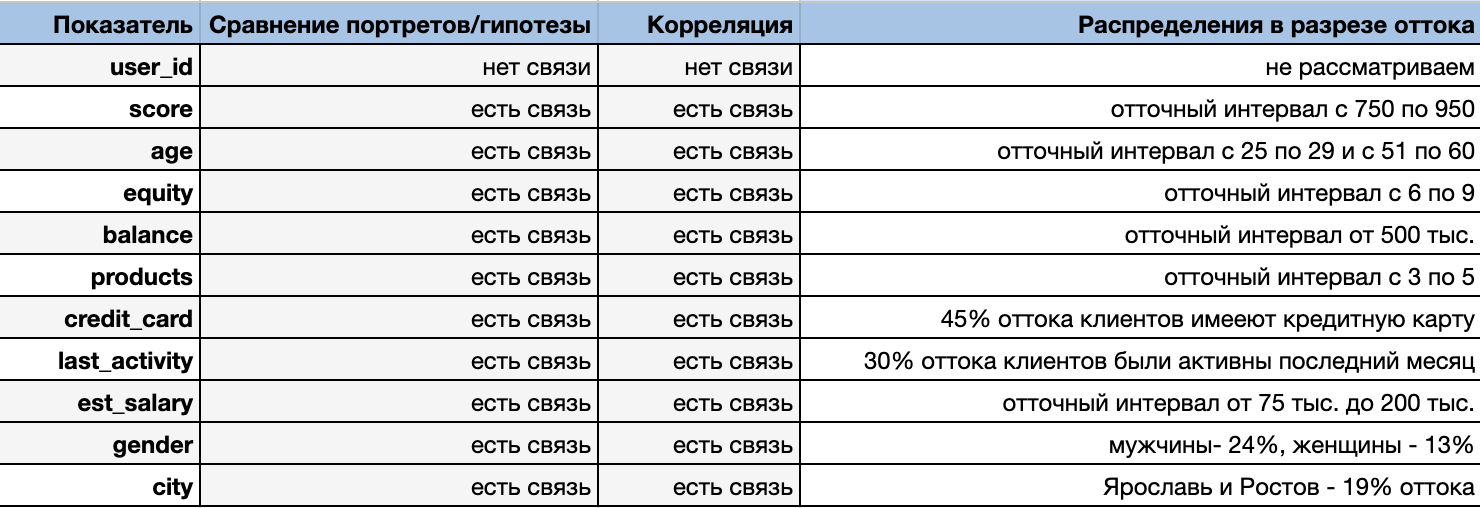

## Сегментация пользователей

Выделим группы с наибольшей численностью оттока, учитывая разные метрики

**Основные метрики, на которые обратим внимание при сегментации:**

* Пол

* Возраст

* Город/Количество продуктов/Зарплата/Активность клиентов

* Чиссленность сегмента от 500 до 2000

* Все пользователи отточные

### Сегмент 1. Клиенты проживающие в Ярославле, Ростове и Рыбинске

In [ ]:
segment1 = pd.pivot_table(leave,
               index=["gender"],
               values=["age"],
               columns=["city"],
               aggfunc=['count'])
segment1

In [ ]:
name_rest = ['Ростов', 'Рыбинск', 'Ярославль']
values = [265, 437, 1117]
''
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title = 'Распределение оттока по городам')])
fig.show()

* 1117 клиентов в Ярославле 
* Самая большая выборка оттока клиентов
* В особенности, большое количество мужчин собирающихся уходить из банка
* Женщин, также подавляющие большинство, относительно других городов

Если данные актуальны на 2022 год, причина может быть в политической обстановке и снижением желания банков выдавать кредитные продукты мужчинам. 

### Сегмент 2. Активность пользователей, при наличии кредитной карты

In [ ]:
df.query('credit_card == 1 and last_activity == 1').agg({"churn":["count","sum","mean"]})

In [ ]:
segment2 = pd.pivot_table(leave,
               index=["last_activity"],
               values=["user_id"],
               columns=["credit_card"],
               aggfunc=['count'])
segment2

In [ ]:
#fig = px.bar(pivot, x = , y = 'Уровень оттока', color = 'Уровень оттока', title = 'Уровень оттока ' + index)
#fig.show()

In [ ]:
sns.heatmap(segment2, cmap="coolwarm")
plt.title('Активность пользователей, при наличии кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Активность последний месяц');

**Группа 1**
* 817 пользователей не имели кредитную карту и не были активны последний месяц

**Группа 2**
* 1003 имели кредитную карту, но были активны последний месяц
* Возможно закрыли кредит и более не планировали использовать услуги банка



Чем больше маркетинговых рассылок и, как следствие, активность пользователя в мобильном приложении или сайте банка, тем больше мы можем продать услуг. Интересно посмотреть активность пользователей на сайте, в этом может скрываться одна из причин оттока

In [ ]:
#df.query('products > 3 and last_activity == 1').agg({"churn":["count","sum","mean"]})

### Сегмент 3. Пользователи с зарплатой от 75 до 200 тыс. в зависимости от количества продуктов

In [ ]:
df.query('products > 2 and est_salary > 75000').agg({"churn":["count","sum","mean"]})

По графику влияния количества продуктов на отток клиентов обратили внимание, что есть высокая зависимость оттока от оценки собственности. Берем выборку клиентов с зарплатой от 75 тыс. до 200 тыс. - самый плотный диапазон уходящих клиентов. 

In [ ]:
#user = df.query('churn == 1 and 75000 < est_salary < 200000').sort_values(by = 'est_salary', ascending=False)
#user
user = df.query('churn == 1 and 75000 < est_salary < 200000').sort_values(by = 'est_salary', ascending=False)
user

In [ ]:
def pivot4(user, index):
    
    pivot4 = user.pivot_table(index = index, values = 'est_salary', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot4.columns = [index, 'Кол-во клиентов', 'Общий доход категории', 'Средняя зарплата']
    display(pivot4.sort_values('Кол-во клиентов', ascending = False))
    
    
    
    fig = px.bar(pivot4, x = index, y = 'Кол-во клиентов', color = 'Кол-во клиентов', title = 'Кол-во клиентов ' + index)
    fig.show()
    

pivot4(user, 'products')

In [ ]:
pivot4(user, 'credit_card')

In [ ]:
user.query('churn == 1 and 75000 < est_salary < 200000 and products == 2 and credit_card == 0').sort_values(by = 'est_salary', ascending=False)


* 637 клиентов имеющих 2 продукта планируют покинуть банк
* При этом 345 из них, не имеют кредитную карту, а всего в выборке этого сегмента 518 клиентов без кредитки 

Чаще всего через банковские приложения и интернет-банк пользователи оформляют вклады и накопительные счета, наши пользователи без кредитной карты скорее всего имели именно данные продукты. Оформляя вклады и накопительные счета повышается лояльность к банку. Такие клиенты могли снять деньги после завершения начислений по вкладам, либо понижения процентной ставки по накопительным счетам. 

Вторая половина клиентов, имеет кредитную карту. Скорее всего, это клиенты, которые приобрели потребительский, ипотечный или автомобильный кредит. Они либо закрыли кредит, либо нашли условия лучше и решили рефинансироваться.

**Рекомендации**
* Можно сделать удобный раздел на сайте, в котором написать письмо в банк может любой пользователь. Насколько ему нравятся продукты банка, которыми он пользуется
* Соединить часть продуктов, к примеру, за пользование кредитной/дебетовой картой проводить начисление кэшбэка, который можно использовать на оплату каких-либо услуг банка. Таким образом, клиент активно использует несколько продуктов банка. Деньги используются в оборотах банка

In [ ]:
#* 674 клиента имеют на зарплату от 150 тыс. Это 7% от общего числа клиентов
#* VIP клиенты предпочитают не только к качественные товары/услуги, но и высококлассный сервис. 
#* Имееют высокие обороты и наиболее важны для банковской сферы
#* Увеличивают рейтинг и доверие к банку

#Возможно, их не устраивает качество продуктов или тарификация. Стоит посмотреть преимиальные услуги, #насколько они релевантны для VIP сегмента. Большая часть высокодоходных клиентов имеют только 1 продукт, #возможно, в других банках бизнес линия продуктов более расширена. Важно, построить удобную экосистему для #бизнеса клиента: от крутых терминалов, до аутсорсной бухгалтерии

## Работа над ошибками. Сегменты пользователей

Выделим наиболее высоотточные сегменты пользователей банка

In [ ]:
df.query('gender == "М" and last_activity == 1 and balance > 500').agg({"churn":["count","sum","mean"]})

In [ ]:
df.query('820 < score < 910 and last_activity == 1').agg({"churn":["count","sum","mean"]})

In [ ]:
df.query('75000 < est_salary < 200000 and last_activity == 1 and balance > 400').agg({"churn":["count","sum","mean"]})

  
<div class="alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b> </b> 
    
**Выделили 3 сегмента пользователей, больше приверженных оттоку.**
    
**Сегмент 1. Клиенты мужчины, активные последний месяц, баланс более 500 тыс.**
* 53% оттока и 530 клиентов
    
**Сегмент 2. Клиенты имеющие оценку кредитного скоринга от 820 до 910, активные последний месяц** 
* 44% оттока и 856 клиентов
    
**Сегмент 3. Клиенты с зарплатой от 75 тыс. до 200 тыс., активные последний месяц и имеющие баланс более 400 тыс.** 
* 42% оттока и 646 клиентов
    
 
 </div><br><br>

## Вывод

<div style="border: solid green 2px; padding: 20px"> 
<b> </b>
    
**Цель исследования** - изучить причины оттока клиентов, сегментировать пользователей банка, предоставить рекомендации по удержанию и возврату клиентской базы
___

**По итогу анализа оттока клиентов, выделили следующие выводы:**
    
* В выборке было 10000 пользователей
    
* Больше всего отточных клиентов в Ярославле и Ростове

* Процент оттока мужчин выше - 24%, чем женщин - 13%

* 25-29 и 51-60 возрастные категории отточных клиентов с наибольшим количеством

* Процент отточных клиентов имеет кредитную карту - 45%, неотточных - 30%

* Процент неотточных клиентов были активны последний месяц - 30%, неотточных - 48%

* Наиболее плотное распределение оттока у клиентов с баллами оценки кредитного скоринга от 750 до 950.
    
* Несмотря на небольшой процент оттока у клиентов имеющих 1 продукт (20%), таких клиентов 969, их можно определить в отдельный сегмент
* Всего 601 пользователей, у которых от 3-х продуктов хотят покинуть банк

    
___
     
**Матрица корреляций дает нам следующие выводы:**
    
* Наличие кредитной карты имеет обратную зависимость 13%. Чем больше кредитных карт, тем меньше отток клиентов
* При этом, чем больше продуктов, тем выше вероятность оттока
* По возрасту проходит обратная слабая связь, из общей выборки, мы имеем небольшое количество возрастных категорий, которые наиболее подвережены оттоку
* Кредитный рейтинг слабо влияет на отток клиентов - 11%
* Активность клиентов последний месяц и оценка собственности имеют высокую корреляцию 17% и 27%   
    
___
    
**Статистический анализ показал:**
    
**Первая гипотеза - отток не влияет на доходы пользователей**

* Проверили с помощью двух критериев t-критерия и u-критерия, получили противоречивые данные
* Учитывая, что выбросы в нашем случае не отражают реальную картину и мы можем их убрать, ориентироваться стоит на критерий Стьюдента.
    
    
**Вторая гипотеза - отток не влияет на оценку скоринга пользователей**

* Для оценки скоринга пользователей подходит больше критерий Стьюдента, потому что в нем нет выбросов. 
* Отток влияет на оценку скоринга пользователей
    
</div>

## Рекомендации


<div class="alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
**Рекомендации**

Чем больше маркетинговых рассылок и, как следствие, активность пользователя в мобильном приложении или сайте банка, тем больше мы можем продать услуг. 
    
    
Чаще всего через банковские приложения и интернет-банк пользователи оформляют вклады и накопительные счета, наши пользователи без кредитной карты скорее всего имели именно данные продукты. Оформляя вклады и накопительные счета повышается лояльность к банку. Такие клиенты могли снять деньги после завершения начислений по вкладам, либо понижения процентной ставки по накопительным счетам. 

Вторая половина клиентов, имеет кредитную карту. Скорее всего, это клиенты, которые приобрели потребительский, ипотечный или автомобильный кредит. Они либо закрыли кредит, либо нашли условия лучше и решили рефинансироваться.
    

* Можно сделать удобный раздел на сайте, в котором написать письмо в банк может любой пользователь. Насколько ему нравятся продукты банка, которыми он пользуется
* Соединить часть продуктов, к примеру, за пользование кредитной/дебетовой картой проводить начисление кэшбэка, который можно использовать на оплату каких-либо услуг банка. Таким образом, клиент активно использует несколько продуктов банка. Деньги используются в оборотах банка


